# **Insurance Cost Prediction**


## **Problem Statement**

- Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.

- Down here is a detailed data analysis on the given insurance data, finding the major factors of the individuals inflicting the final premium price and creating our own machine learning model to do the cost prediction for the given data.

# **EDA and Hypothesis Testing for Insurance Cost Prediction**(Block 2)

## **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


### Basic EDA

In [3]:
df.shape

(986, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [6]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


- Hence we can conclude that there are **no NULL** values in the data

In [7]:
#Creating a copy of the data for extended analysis
df1 = df.copy()
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [8]:
df1.Age.min(), df.Age.max()

(18, 66)

In [9]:
df1.PremiumPrice.min(), df1.PremiumPrice.max()

(15000, 40000)

In [10]:
# Creating new categories in Age and Premium data received for better analysis
df1["age_cat"] = pd.cut(df1["Age"], bins = [18, 25, 35, 55, 66], labels = ["Youth", "Young-adults", "middle aged adults", "senior citizens"])
df1["premium_cat"] = pd.cut(df1["PremiumPrice"], bins = [15000,20000,30000,40000], labels = ["low", "medium", "high"])
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,age_cat,premium_cat
0,45,0,0,0,0,155,57,0,0,0,25000,middle aged adults,medium
1,60,1,0,0,0,180,73,0,0,0,29000,senior citizens,medium
2,36,1,1,0,0,158,59,0,0,1,23000,middle aged adults,medium
3,52,1,1,0,1,183,93,0,0,2,28000,middle aged adults,medium
4,38,0,0,0,1,166,88,0,0,1,23000,middle aged adults,medium


In [11]:
df1["BMI"] = df1["Weight"] / (df1["Height"] / 100) ** 2
df1["BMI"] = df1["BMI"].round(2)
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,age_cat,premium_cat,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,middle aged adults,medium,23.73
1,60,1,0,0,0,180,73,0,0,0,29000,senior citizens,medium,22.53
2,36,1,1,0,0,158,59,0,0,1,23000,middle aged adults,medium,23.63
3,52,1,1,0,1,183,93,0,0,2,28000,middle aged adults,medium,27.77
4,38,0,0,0,1,166,88,0,0,1,23000,middle aged adults,medium,31.93


In [12]:
df1["BMI"].min(), df1["BMI"].max()

(15.16, 50.0)

In [13]:
# Creating BMI cat for analysis
bmi_cat = pd.cut(df1["BMI"], bins = [15.00, 18.50, 25.00, 30.00, 40.00, 50.00], labels = ["Underweight", "Normal", "Overweight", "Obesity", "Extreme Obesity"])
df1["bmi_cat"] = bmi_cat
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,age_cat,premium_cat,BMI,bmi_cat
0,45,0,0,0,0,155,57,0,0,0,25000,middle aged adults,medium,23.73,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,senior citizens,medium,22.53,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,middle aged adults,medium,23.63,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,middle aged adults,medium,27.77,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,middle aged adults,medium,31.93,Obesity


In [14]:
df1.shape

(986, 15)

- Now the revised data has 15 columns

In [15]:
# Finding the unique entries in each column
for i in df1.columns:
  print(f"Unique entries in {i: <25} = {df1[i].nunique()}")

Unique entries in Age                       = 49
Unique entries in Diabetes                  = 2
Unique entries in BloodPressureProblems     = 2
Unique entries in AnyTransplants            = 2
Unique entries in AnyChronicDiseases        = 2
Unique entries in Height                    = 44
Unique entries in Weight                    = 74
Unique entries in KnownAllergies            = 2
Unique entries in HistoryOfCancerInFamily   = 2
Unique entries in NumberOfMajorSurgeries    = 4
Unique entries in PremiumPrice              = 24
Unique entries in age_cat                   = 4
Unique entries in premium_cat               = 3
Unique entries in BMI                       = 631
Unique entries in bmi_cat                   = 5


In [16]:
# Age count to show the entries with highest and lowest age group
Age_count = df1["Age"].value_counts()
Age_count.head(), Age_count.tail()

(Age
 43    30
 27    27
 42    27
 35    26
 45    25
 Name: count, dtype: int64,
 Age
 56    15
 23    13
 26    13
 57    12
 39    11
 Name: count, dtype: int64)

In [17]:
# Premium price count to show the premium which was received by max members and min members
pp_count = df1["PremiumPrice"].value_counts()
pp_count.head(), pp_count.tail()

(PremiumPrice
 23000    249
 15000    202
 28000    132
 25000    103
 29000     72
 Name: count, dtype: int64,
 PremiumPrice
 22000    1
 40000    1
 20000    1
 27000    1
 17000    1
 Name: count, dtype: int64)

In [18]:
Surgery_count = df1["NumberOfMajorSurgeries"].value_counts()
Surgery_count

,count
NumberOfMajorSurgeries,
0,479
1,372
2,119
3,16


- Shows that Maximum people in the entry have had "0" surgeries and only 16 people have had "3" surgeries.

In [19]:
Age_cat_count = df1["age_cat"].value_counts()
Age_cat_count

,count
age_cat,
middle aged adults,413
Young-adults,210
senior citizens,203
Youth,137


- Shows that maximum entries belongs to middle aged category(aged between 35-55 yrs). And only minimum entries of youth were present(aged between 18-25 yrs).

In [20]:
premium_cat_count = df1["premium_cat"].value_counts()
premium_cat_count

,count
premium_cat,
medium,642
high,120
low,22


- Maximum people have received only average premium ranging between 20,000 to 30,000.

In [21]:
bmi_cat_count = df1["bmi_cat"].value_counts()
bmi_cat_count

,count
bmi_cat,
Overweight,326
Normal,319
Obesity,266
Underweight,39
Extreme Obesity,36


- Maximum entries are found to be "Overweight" ranging from 25.00 to 30.00 in BMI index.

## Univariate visual analysis

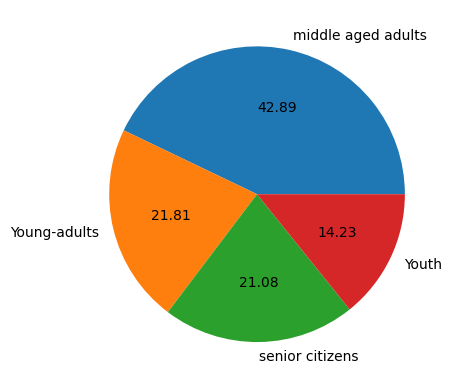

In [22]:
from seaborn.widgets import color_palette
plt.pie(Age_cat_count, labels = Age_cat_count.index, autopct = "%.2f")
plt.show()

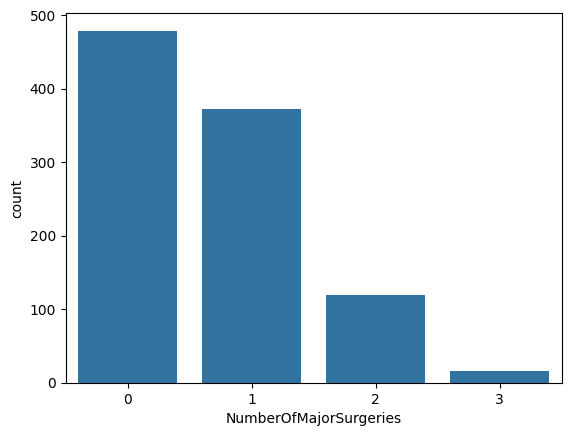

In [23]:
sns.countplot(data = df1, x = df1["NumberOfMajorSurgeries"])
plt.show()

## Multivariate visual analysis

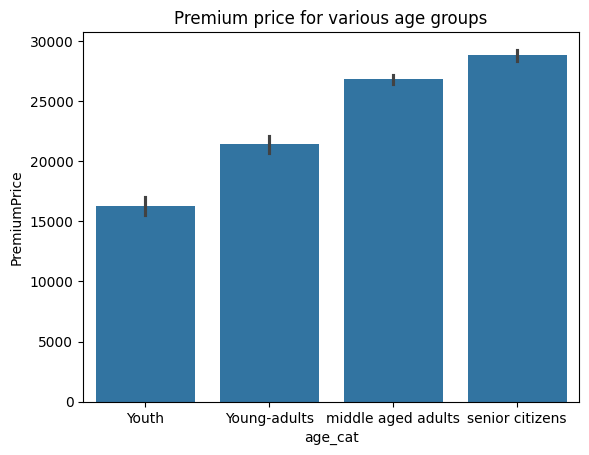

In [24]:
plt.title("Premium price for various age groups")
sns.barplot(data = df1, x=df1["age_cat"], y = df1["PremiumPrice"])
plt.show()

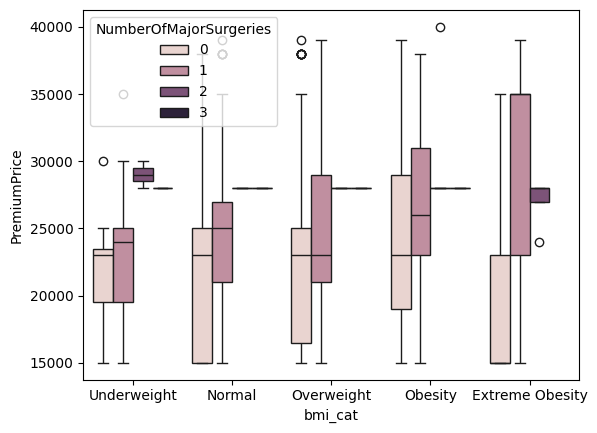

In [25]:
sns.boxplot(data=df1, x="bmi_cat", y="PremiumPrice", hue="NumberOfMajorSurgeries")
plt.show()

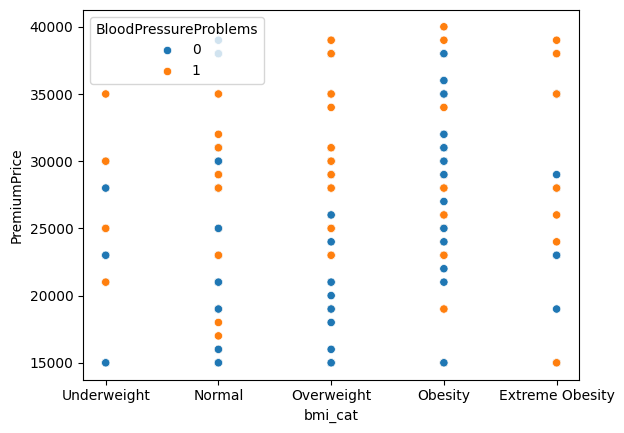

In [26]:
sns.scatterplot(data=df1, x= "bmi_cat", y="PremiumPrice", hue="BloodPressureProblems")
plt.show()

## Correlation analysis

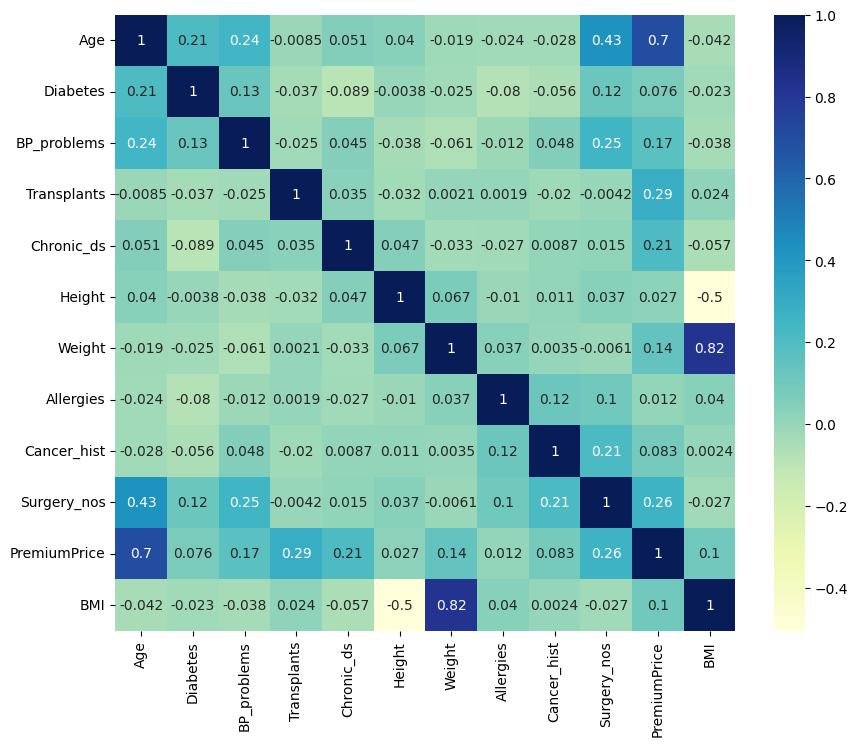

In [27]:
df1.rename(columns={'BloodPressureProblems': 'BP_problems', 'AnyTransplants': 'Transplants', 'AnyChronicDiseases': 'Chronic_ds', 'KnownAllergies' : 'Allergies', 'HistoryOfCancerInFamily' : 'Cancer_hist', 'NumberOfMajorSurgeries' : "Surgery_nos"}, inplace=True)
numerical_features = df1.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,8))
sns.heatmap(df1[numerical_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

- From the above chart it is observed that the highest correlation is found between "Weight" and "BMI" followed by "Premium Price" and "Age".
- Other notable correlations are observed between "Number of surgeries" and "Blood Pressure Problems", "Number of surgeries" and "Premium Price", "Any transplants" and "Premium Price". Like wise between "Chronic diseases" and "Premium Price"
- The above observations indicate that people with more BP problems has higher chances of having a surgery, hence also gets higher premium price as insurance.
- Similarly those who undergoes any kind of transplants or has chronic diseases tends to get higher premium price.


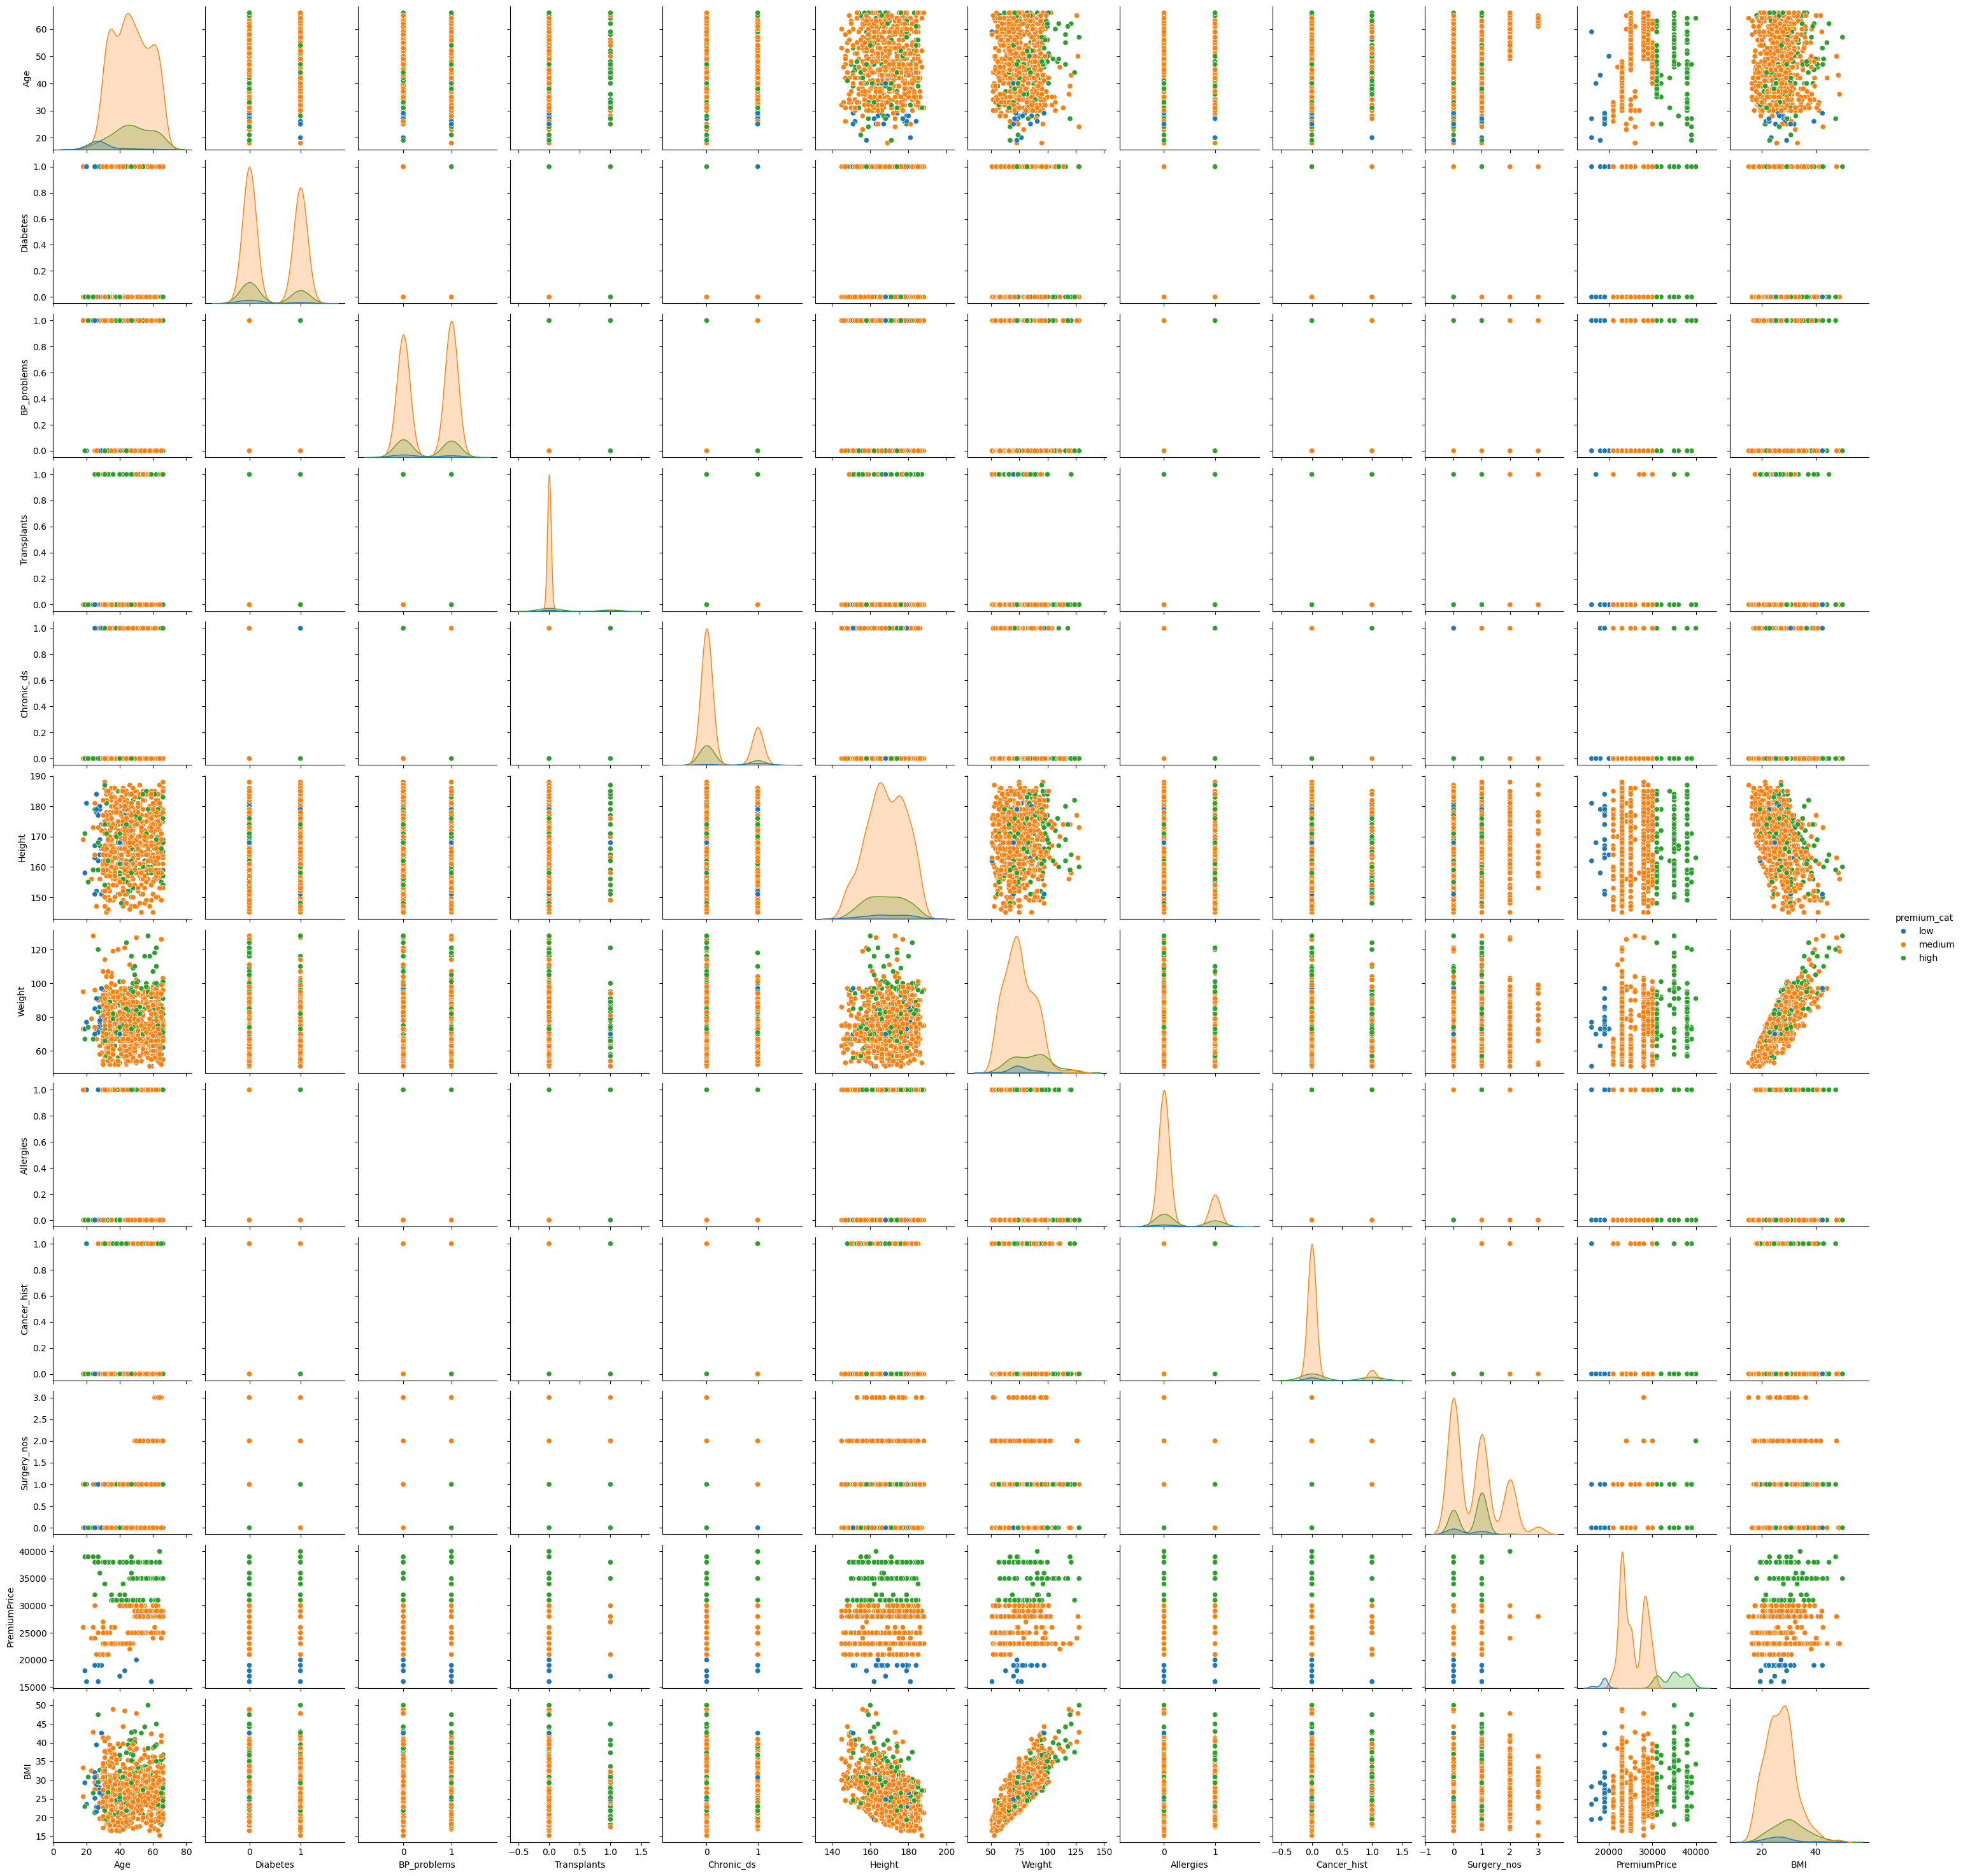

In [28]:
sns.pairplot(data = df1, hue = "premium_cat")

## Outlier treatment

Age outlier

In [29]:
Q1 = np.percentile(df1["Age"],25)
Q2 = np.percentile(df1["Age"],50)
Q3 = np.percentile(df1["Age"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Age IQR :", IQR)

Q1 : 30.0
Q2 : 42.0
Q3 : 53.0
Age IQR : 23.0


In [30]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 87.5
Lower whisker : 0


### Weight outlier

In [31]:
Q1 = np.percentile(df1["Weight"],25)
Q2 = np.percentile(df1["Weight"],50)
Q3 = np.percentile(df1["Weight"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Weight IQR :", IQR)

Q1 : 67.0
Q2 : 75.0
Q3 : 87.0
Weight IQR : 20.0


In [32]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 117.0
Lower whisker : 37.0


### Height outlier

In [33]:
Q1 = np.percentile(df1["Height"],25)
Q2 = np.percentile(df1["Height"],50)
Q3 = np.percentile(df1["Height"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Height IQR :", IQR)

Q1 : 161.0
Q2 : 168.0
Q3 : 176.0
Height IQR : 15.0


In [34]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 198.5
Lower whisker : 138.5


### BMI outlier

In [35]:
Q1 = np.percentile(df1["BMI"],25)
Q2 = np.percentile(df1["BMI"],50)
Q3 = np.percentile(df1["BMI"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("BMI IQR :", IQR)

Q1 : 23.395
Q2 : 27.155
Q3 : 30.76
BMI IQR : 7.365000000000002


In [36]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 41.807500000000005
Lower whisker : 12.347499999999997


### Premium outlier

In [37]:
Q1 = np.percentile(df1["PremiumPrice"],25)
Q2 = np.percentile(df1["PremiumPrice"],50)
Q3 = np.percentile(df1["PremiumPrice"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Premium price IQR :", IQR)

Q1 : 21000.0
Q2 : 23000.0
Q3 : 28000.0
Premium price IQR : 7000.0


In [38]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 38500.0
Lower whisker : 10500.0


- All the outliers present in the given data are natural variations that occur in a population dataset, hence it can be left as it is in the dataset.

# **Hypothesis Testing**

In [39]:
from scipy.stats import norm, t, f
from scipy.stats import ttest_ind, ttest_rel, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import f, f_oneway, kruskal, shapiro, levene, kstest

## **Presence of chronic diseases lead to higher insurance premiums OR not**

In [40]:
# Filtering the premium price based on the presence and absence of chronic diseases
Chronic_ds_present = df1.loc[df1["Chronic_ds"]== 1]["PremiumPrice"]
Chronic_ds_absent = df1.loc[df1["Chronic_ds"] == 0]["PremiumPrice"]
Chronic_ds_present.mean(), Chronic_ds_absent.mean()

(27112.3595505618, 23725.247524752474)

**Assumption test**

In [41]:
# Levene test
x_stat, p_value = levene(Chronic_ds_present, Chronic_ds_absent)
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 6.508345857175313
p_value : 0.01088728404011798
Reject Ho


**Visual test**

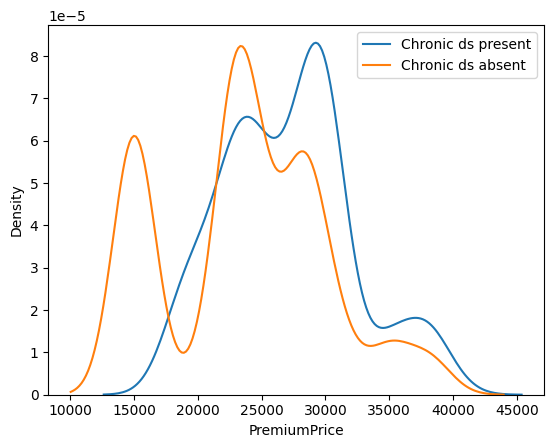

In [42]:
sns.kdeplot(Chronic_ds_present)
sns.kdeplot(Chronic_ds_absent)
plt.legend(["Chronic ds present", "Chronic ds absent"])
plt.show()

***T-test of independence (to find if presence of chronic diseases lead to higher insurance premiums OR not)***

In [43]:
#Ho :  Presence of chronic diseases has no effect on higher insurance premium
#Ha : Presence of chronic diseases has effect on higher insurance premium

t_stat, p_value = ttest_ind(Chronic_ds_present, Chronic_ds_absent , alternative = "greater")
print("t_stat :", t_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Presence of chronic diseases has effect on higher insurance premium")
else:
  print("Fail to reject Ho : Presence of chronic diseases has NO effect on higher insurance premium")

t_stat : 6.69104572734849
p_value : 1.856706882645741e-11
Reject Ho : Presence of chronic diseases has effect on higher insurance premium


## **Transplant operations lead to higher insurance premiums or not**

In [44]:
# Filtering the premium price based on the presence and absence of transplants
Transplants_present = df1.loc[df1["Transplants"]== 1]["PremiumPrice"]
Transplants_absent = df1.loc[df1["Transplants"] == 0]["PremiumPrice"]
Transplants_present.mean(), Transplants_absent.mean()

(31763.636363636364, 23897.95918367347)

**Assumption test**

In [45]:
# Levene test
x_stat, p_value = levene(Transplants_present, Transplants_absent)
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 8.93485569615894
p_value : 0.002867336380270254
Reject Ho


**Visual test**

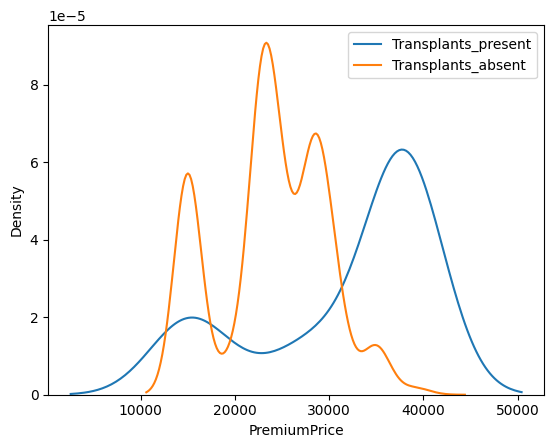

In [46]:
sns.kdeplot(Transplants_present)
sns.kdeplot(Transplants_absent)
plt.legend(["Transplants_present", "Transplants_absent"])
plt.show()

***T-test of independence (to find if presence of transplants leads to higher insurance premiums OR not)***

In [47]:
#Ho :  Presence of transplants has no effect on higher insurance premium
#Ha : Presence of transplants has effect on higher insurance premium

t_stat, p_value = ttest_ind(Transplants_present, Transplants_absent , alternative = "greater")
print("t_stat :", t_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Presence of transplants has effect on higher insurance premium")
else:
  print("Fail to reject Ho : Presence of transplants has NO effect on higher insurance premium")

t_stat : 9.471654448151899
p_value : 9.893647711816386e-21
Reject Ho : Presence of transplants has effect on higher insurance premium


## **History of cancer in family has effect on insurance premium or not**

In [48]:
# Filtering the premium price based on the presence and absence of cancer history in family
Cancer_present = df1.loc[df1["Cancer_hist"]== 1]["PremiumPrice"]
Cancer_absent = df1.loc[df1["Cancer_hist"] == 0]["PremiumPrice"]
Cancer_present.mean(), Cancer_absent.mean()

(25758.620689655174, 24147.126436781607)

**Assumption test**

In [49]:
# Levene test
x_stat, p_value = levene(Cancer_present, Cancer_absent)
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 5.997899252289433
p_value : 0.014496453126833982
Reject Ho


**Visual test**

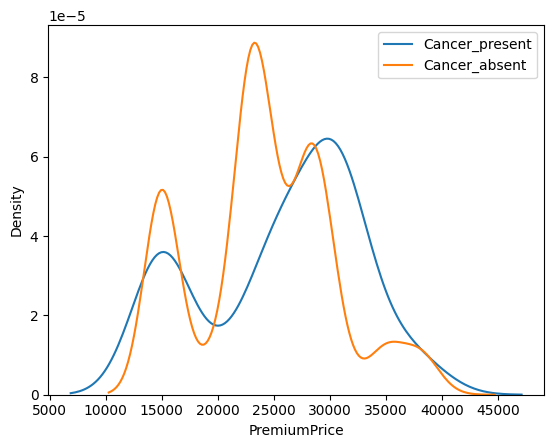

In [50]:
sns.kdeplot(Cancer_present)
sns.kdeplot(Cancer_absent)
plt.legend(["Cancer_present", "Cancer_absent"])
plt.show()

***T-test of independence (to find if presence of cancer history in the family leads to higher insurance premiums OR not)***

In [51]:
#Ho :  Presence of cancer history has no effect on higher insurance premium
#Ha : Presence of cancer history has effect on higher insurance premium

t_stat, p_value = ttest_ind(Cancer_present, Cancer_absent , alternative = "greater")
print("t_stat :", t_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Presence of cancer history in family has effect on higher insurance premium")
else:
  print("Fail to reject Ho : Presence of cancer history in family has NO effect on higher insurance premium")

t_stat : 2.617041984412821
p_value : 0.004502793655223513
Reject Ho : Presence of cancer history in family has effect on higher insurance premium


## **Number of major surgeries has effect on higher insurance premium or not**

In [52]:
surgery_0 = df1[df1["Surgery_nos"] == 0]["PremiumPrice"]
surgery_1 = df1[df1["Surgery_nos"] == 1]["PremiumPrice"]
surgery_2 = df1[df1["Surgery_nos"] == 2]["PremiumPrice"]
surgery_3 = df1[df1["Surgery_nos"] == 3]["PremiumPrice"]
surgery_0.mean(), surgery_1.mean(), surgery_2.mean(), surgery_3.mean()

(22968.684759916494, 24741.935483870966, 28084.03361344538, 28000.0)

**Assumption test**

In [53]:
# kruskal test
f_stat, p_value = kruskal(surgery_0, surgery_1, surgery_2, surgery_3)
print("f_stat :", f_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

f_stat : 93.81277073618764
p_value : 3.3223412749827346e-20
Reject Ho : Atleast one of them is different


Visual test

<ipython-input-54-4fba6d252631>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(surgery_3)


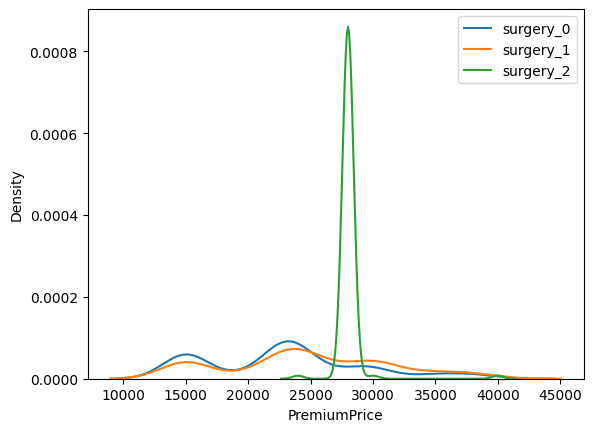

In [54]:
sns.kdeplot(surgery_0)
sns.kdeplot(surgery_1)
sns.kdeplot(surgery_2)
sns.kdeplot(surgery_3)
plt.legend(["surgery_0", "surgery_1", "surgery_2", "surgery_3"])
plt.show()

- Visual test clearly shows the premium price varies based on the no. of surgeries performed.

***ANOVA test (to find if the no. of major surgeries performed has effect over premium price or not)***

In [55]:
# Ho: Premium price insurance is similar for different no. of surgeries
# Ha: Premium price insurance differs for different no. of surgeries

f_stat, p_value = f_oneway(surgery_0, surgery_1, surgery_2, surgery_3)
print("f_stat :", f_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Premium price insurance differs for different no. of surgeries")
else:
  print("Fail to reject Ho: Premium price insurance is similar for different no. of surgeries")

f_stat : 26.13539359740762
p_value : 2.8711631377228097e-16
Reject Ho : Premium price insurance differs for different no. of surgeries


## ***Number of surgeries are dependent on Blood pressure problems or not***

In [56]:
bp_surgeries = pd.crosstab(df1["BP_problems"], df1["Surgery_nos"], margins= True)
bp_surgeries

Surgery_nos,0,1,2,3,All
BP_problems,,,,,
0,315,172,26,11,524
1,164,200,93,5,462
All,479,372,119,16,986


### ***Chi-square (Test of Independence)***

In [57]:
# Ho : Number of surgeries is not dependent on Blood pressure problems
# Ha : Number of surgeries is dependent on Blood pressure problems

chi_stat, p_value, dof, expected = chi2_contingency(bp_surgeries)
print("chi_stat :", f_stat)
print("p_value :", p_value)
print("dof :", dof)
print("Expected :", expected)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho: Number of surgeries is dependent on Blood pressure problems")
else:
  print("Fail to reject Ho: Number of surgeries is not dependent on Blood pressure problems")

chi_stat : 26.13539359740762
p_value : 2.8395630390366105e-15
dof : 8
Expected : [[254.55983773 197.69574037  63.24137931   8.5030426  524.        ]
 [224.44016227 174.30425963  55.75862069   7.4969574  462.        ]
 [479.         372.         119.          16.         986.        ]]
Reject Ho: Number of surgeries is dependent on Blood pressure problems


## ***Chronic diseases are dependent on history of cancer in the family or not***

In [58]:
chronic_cancer = pd.crosstab(df1["Chronic_ds"], df1["Cancer_hist"], margins= True)
chronic_cancer

Cancer_hist,0,1,All
Chronic_ds,,,
0,714,94,808
1,156,22,178
All,870,116,986


### ***Chi-square (Test of Independence)***

In [59]:
# Ho : Chronic diseases are not dependent on history of cancer in family
# Ha : Chronic diseases is dependent on history of cancer in family

chi_stat, p_value, dof, expected = chi2_contingency(chronic_cancer)
print("chi_stat :", f_stat)
print("p_value :", p_value)
print("dof :", dof)
print("Expected :", expected)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho: Chronic diseases are dependent on history of cancer in family")
else:
  print("Fail to reject Ho: Chronic diseases are not dependent on history of cancer in family")

chi_stat : 26.13539359740762
p_value : 0.9993314302405011
dof : 4
Expected : [[712.94117647  95.05882353 808.        ]
 [157.05882353  20.94117647 178.        ]
 [870.         116.         986.        ]]
Fail to reject Ho: Chronic diseases are not dependent on history of cancer in family


# **ML Modeling** -----> (Block 3)

Since the Target variable is already provided and the data type is continuous, we're choosing Linear regression as the ML model and do some analysis on it.

# ***Regression Analysis***

In [60]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Scaling the data using min max scaler to study about Linear Regression**

In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(df1[["Age","Diabetes","BP_problems", "Transplants", "Chronic_ds", "Height", "Weight", "Allergies", "Cancer_hist", "Surgery_nos", "BMI"]]),
                 columns= ["Age","Diabetes","BP_problems", "Transplants", "Chronic_ds", "Height", "Weight", "Allergies", "Cancer_hist", "Surgery_nos", "BMI"])
X

,Age,Diabetes,BP_problems,Transplants,Chronic_ds,Height,Weight,Allergies,Cancer_hist,Surgery_nos,BMI
0,0.562500,0.0,0.0,0.0,0.0,0.232558,0.074074,0.0,0.0,0.000000,0.245982
1,0.875000,1.0,0.0,0.0,0.0,0.813953,0.271605,0.0,0.0,0.000000,0.211538
2,0.375000,1.0,1.0,0.0,0.0,0.302326,0.098765,0.0,0.0,0.333333,0.243111
3,0.708333,1.0,1.0,0.0,1.0,0.883721,0.518519,0.0,0.0,0.666667,0.361940
4,0.416667,0.0,0.0,0.0,1.0,0.488372,0.456790,0.0,0.0,0.333333,0.481343
...,...,...,...,...,...,...,...,...,...,...,...
981,0.000000,0.0,0.0,0.0,0.0,0.558140,0.197531,0.0,0.0,0.000000,0.238232
982,0.958333,1.0,1.0,0.0,0.0,0.186047,0.234568,0.0,0.0,1.000000,0.423077
983,0.791667,0.0,1.0,0.0,0.0,0.232558,0.246914,0.0,0.0,0.333333,0.413031
984,0.604167,1.0,1.0,0.0,0.0,0.302326,0.271605,1.0,0.0,0.333333,0.404133


In [62]:
y = df1["PremiumPrice"]

## **Linear regression**

**Dividing the data into 80% train data and 20% test data**

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

In [64]:
y_train = np.array(y_train)

In [65]:
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.14e-161
Time:                        17:21:43   Log-Likelihood:                -7607.9
No. Observations:                 788   AIC:                         1.524e+04
Df Residuals:                     776   BIC:                         1.530e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.498e+04   2341.572      6.399      

The StatsModel gives us  the R squared and adjusted R squared values directly.

R-squared:                       0.635

Adj. R-squared:                  0.630

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [67]:
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
lr.coef_

array([15613.54531989,  -399.08295285,    91.52956222,  7960.69438801,
        2780.77485883, -1071.60361195,  7526.14403107,   265.32903178,
        2226.9457893 , -1623.98268833, -2818.12596294])

In [69]:
lr.intercept_

14984.098697732361

In [70]:
y_pred1 = lr.predict(X_test)
y_pred1

array([21931.26175056, 17558.99168587, 20727.57104222, 26947.92418551,
       18109.19982248, 29148.69656869, 18814.39238993, 35059.40558843,
       18026.06870122, 26908.6486378 , 23111.442342  , 23768.99003413,
       25031.03503668, 24390.70392518, 23451.54221134, 29687.69821232,
       17215.34331627, 19680.83746626, 25320.5702365 , 18570.25940199,
       21585.18811352, 24042.45406489, 28910.81896992, 34462.55150937,
       23976.97629131, 27738.92410345, 25883.20235013, 30296.9652075 ,
       29015.55211228, 22435.29668989, 27734.26926719, 35498.99812922,
       29270.00765319, 30911.13011421, 24846.27779612, 23099.73072782,
       24912.14450448, 26702.42915346, 16818.64830399, 26105.29770224,
       28234.74363625, 28614.74340628, 29091.16515048, 20770.42349901,
       25087.4578149 , 30955.3043678 , 21758.63719642, 25897.03794932,
       29954.36417553, 27793.44595893, 30522.78723721, 19605.80459144,
       29047.96966618, 27915.41323062, 17192.70404376, 40690.43767601,
      

In [71]:
y_pred2 = lr.predict(X_train)
y_pred2

array([16165.97994379, 20854.41680429, 29498.76368767, 28838.72120992,
       24584.83003957, 28211.52619394, 15450.65842256, 24294.30481521,
       28488.39059587, 18921.38963213, 16013.20839624, 32380.36341914,
       25121.79728279, 26616.13172272, 17651.00158307, 16579.73102685,
       27490.54345496, 20154.8019166 , 20767.69342721, 26632.30362994,
       19634.01911681, 26252.132999  , 18241.17258532, 33882.77563234,
       25973.80159667, 21741.48657851, 22113.06997788, 20709.37985685,
       17654.1881043 , 19149.7160248 , 19593.08234546, 26780.05415684,
       31581.99616925, 25808.09094762, 26142.34683411, 23307.51392218,
       25399.76799372, 33425.37100592, 26897.43641815, 29979.4334131 ,
       25189.67164116, 26034.02160775, 31591.87078076, 17508.8473014 ,
       29546.83582819, 27340.14771991, 25792.41196918, 21381.53658487,
       19129.9638164 , 28911.62103813, 26077.53196292, 22256.04491258,
       26208.56291729, 26994.17512769, 25448.25904469, 20993.12740008,
      

In [72]:
from sklearn.metrics import r2_score

In [73]:
r2_score(y_test, lr.predict(X_test))

0.6708087436472316

In [74]:
r2_score(y_train, lr.predict(X_train))

0.6353750141727392

# **Assumptions of Linear Regression**

## ***Linearity***

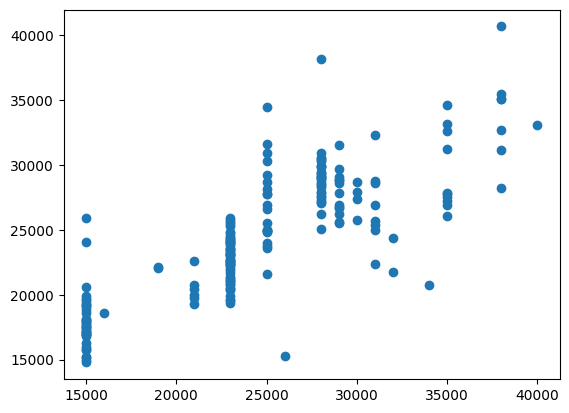

In [75]:
plt.scatter(y_test, y_pred1)

- Correlation is not weak/zero. It looks positive, linearity exists

## ***Variance Inflation Factor*** (To check multicollinearity)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
X_sm

,const,Age,Diabetes,BP_problems,Transplants,Chronic_ds,Height,Weight,Allergies,Cancer_hist,Surgery_nos,BMI
12,1.0,0.125000,0.0,0.0,0.0,0.0,0.767442,0.074074,1.0,0.0,0.333333,0.081228
578,1.0,0.250000,0.0,1.0,0.0,0.0,0.488372,0.518519,0.0,0.0,0.000000,0.533582
441,1.0,0.958333,0.0,1.0,0.0,0.0,0.674419,0.160494,0.0,0.0,0.333333,0.171642
698,1.0,0.791667,1.0,0.0,0.0,0.0,0.511628,0.469136,1.0,0.0,0.000000,0.480769
773,1.0,0.645833,1.0,0.0,0.0,0.0,0.325581,0.135802,0.0,0.0,0.000000,0.268657
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,0.375000,0.0,1.0,1.0,1.0,0.441860,0.086420,0.0,0.0,0.000000,0.183697
320,1.0,0.208333,0.0,0.0,0.0,1.0,0.790698,0.320988,0.0,0.0,0.000000,0.254592
527,1.0,0.500000,0.0,0.0,0.0,0.0,0.930233,0.407407,0.0,0.0,0.333333,0.269231
125,1.0,0.270833,1.0,0.0,1.0,0.0,0.976744,0.543210,1.0,0.0,0.000000,0.344719


In [78]:
vif = pd.DataFrame()
vif['features'] =X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,298.83
11,BMI,81.99
7,Weight,61.74
6,Height,28.61
10,Surgery_nos,1.34
1,Age,1.30
3,BP_problems,1.10
9,Cancer_hist,1.09
2,Diabetes,1.08
8,Allergies,1.03


Height, Weight and BMI(which is derived from height and weight) are the features with VIF more than 10. Eventhough Height and Weight as individual features can be dropped to avoid multicollinearity. BMI is a very important factor to decide health in many cases, hence cannot be dropped.

### **Performing VIF again after dropping columns "Height" and "Weight"**

In [79]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X1 = pd.DataFrame(min_max_scaler.fit_transform(df1[["Age","Diabetes","BP_problems", "Transplants", "Chronic_ds",  "Allergies", "Cancer_hist", "Surgery_nos", "BMI"]]),
                 columns= ["Age","Diabetes","BP_problems", "Transplants", "Chronic_ds", "Allergies", "Cancer_hist", "Surgery_nos", "BMI"])
X1

,Age,Diabetes,BP_problems,Transplants,Chronic_ds,Allergies,Cancer_hist,Surgery_nos,BMI
0,0.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.245982
1,0.875000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.211538
2,0.375000,1.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.243111
3,0.708333,1.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.361940
4,0.416667,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.481343
...,...,...,...,...,...,...,...,...,...
981,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.238232
982,0.958333,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.423077
983,0.791667,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.413031
984,0.604167,1.0,1.0,0.0,0.0,1.0,0.0,0.333333,0.404133


### **Training the new data**

In [80]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state= 10)

In [81]:
X1_sm = sm.add_constant(X1_train)
model = sm.OLS(y_train, X1_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.97e-160
Time:                        17:21:44   Log-Likelihood:                -7616.3
No. Observations:                 788   AIC:                         1.525e+04
Df Residuals:                     778   BIC:                         1.530e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.427e+04    436.165     32.726      

In [82]:
lr.fit(X1_train, y_train)

LinearRegression()

In [83]:
lr.coef_

array([ 1.56923371e+04, -4.27037217e+02,  1.09014909e+01,  7.81945840e+03,
        2.82281337e+03,  2.75020785e+02,  2.25812562e+03, -1.54181675e+03,
        4.34188058e+03])

In [84]:
lr.intercept_

14273.746181982964

In [85]:
y_pred3 = lr.predict(X1_test)
y_pred3

array([21423.71075692, 17479.35593895, 20572.85798225, 26069.65521311,
       18343.82142407, 28652.33827551, 17958.10106677, 34092.61135043,
       19228.72340883, 27368.29058242, 22077.20749555, 23803.60172187,
       25301.12111591, 23992.20858683, 23935.8147561 , 30233.23405405,
       16908.17867739, 19463.76882594, 25088.01483756, 18841.14901355,
       21329.83908927, 24112.49467118, 29122.75914907, 34583.89296924,
       23919.4882516 , 26577.66430937, 25503.281346  , 30510.97735775,
       28742.39695165, 22237.18269198, 27624.89178061, 35380.17951745,
       29705.33192326, 31291.2601288 , 24553.5080688 , 23592.88367866,
       25311.90045907, 26272.68036318, 16507.4084738 , 26044.28688875,
       28431.47568554, 28126.69366175, 28444.40825934, 20776.63127801,
       24441.04815643, 30875.91942865, 21743.92831315, 25642.27689182,
       31227.767805  , 27768.63678028, 31526.33049208, 19737.28269865,
       29907.49191999, 28869.3741833 , 17017.52861655, 39967.34740362,
      

In [86]:
y_pred4 = lr.predict(X1_train)
y_pred4

array([16349.05451197, 20524.48165214, 29554.44659724, 28632.27250996,
       25147.81869613, 27833.83798127, 16107.79310926, 24543.93174795,
       28540.14578982, 18035.27193607, 16717.62507103, 32316.91552168,
       25511.24654805, 26042.20009577, 17825.40718188, 16276.34487202,
       27000.61561891, 20296.82654405, 20064.62116551, 25895.47222751,
       20087.79387472, 26890.26241226, 17322.11574876, 34821.07264791,
       26461.28252549, 22446.43901395, 22225.76456259, 19173.10401415,
       18702.84348263, 18541.65574891, 19293.11731576, 27080.02024764,
       31427.80263515, 26178.80032966, 26448.82290947, 23798.41239116,
       26252.8492939 , 31745.24656778, 26475.18609274, 30520.79621608,
       24295.93110612, 26108.56994081, 30900.80327743, 17156.18634508,
       29479.5866204 , 27987.14020186, 26172.97711545, 20456.23798802,
       20063.29036247, 27987.09134642, 25629.3241957 , 21412.74437675,
       27220.60099608, 26260.94074477, 24845.09929281, 21487.70997386,
      

In [87]:
vif = pd.DataFrame()
vif['features'] =X1_sm.columns
vif['VIF'] = [variance_inflation_factor(X1_sm, i) for i in range(X1_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,10.18
8,Surgery_nos,1.34
1,Age,1.29
3,BP_problems,1.09
2,Diabetes,1.08
7,Cancer_hist,1.08
6,Allergies,1.03
5,Chronic_ds,1.02
9,BMI,1.01
4,Transplants,1.00


* After dropping Height and Weight, VIF of BMI comes down to 1 and now all the given features shows **NO MULTICOLLINEARITY**.
Therefore, we don't need to drop any features further.

### **Normality of residuals**

In [88]:
y_hat = results.predict(X1_sm)

In [89]:
errors = y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

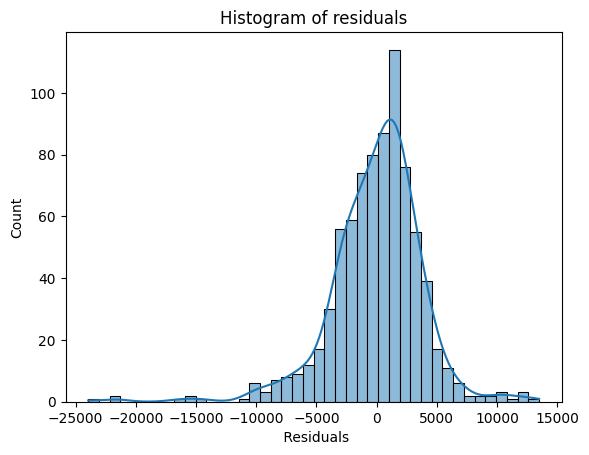

In [90]:
sns.histplot(errors, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [91]:
from scipy import stats
result = stats.shapiro(errors)
result.statistic

0.9256164367658695

- Since the value is closer to 1, it means the distribution is normal

### **Test for Homoscedasticity**

Text(0.5, 1.0, 'Premium price of Insurance vs Residuals')

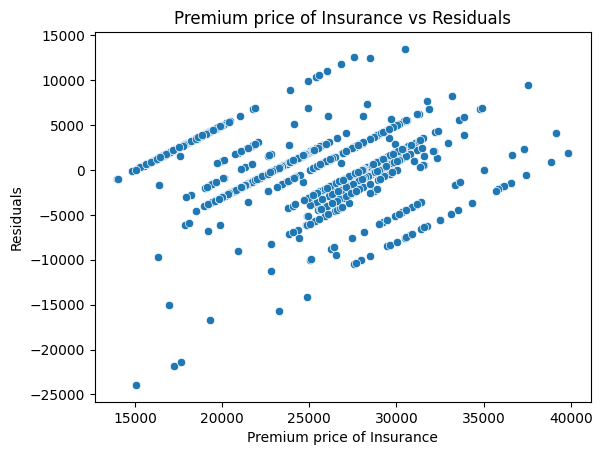

In [92]:
sns.scatterplot(x=y_pred4,y=errors)
plt.xlabel("Premium price of Insurance")
plt.ylabel("Residuals")
plt.title("Premium price of Insurance vs Residuals")

- Null Hypothesis: Heteroscedasticity is not present.
- Alternate Hypothesis: Heteroscedasticity is present.

In [93]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name= ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X1_sm)
lzip(name, test)

[('F statistic', 1.1689936277360775), ('p-value', 0.06324208336170273)]

- Since p-value > alpha(0.05) - Homoscedaticity is present

### **Auto-correlation**

- There is no auto-correlation since the features height and weight have been dropped and all the other features are independent of each other except the target column.

## **Insights on Assumptions of Linear regression model**

  - Linear function EXISTS.
  - Multicollinearity was earliar found between Height, Weight and BMI. so Height and weight were dropped and the Linear regression analysis was performed again. After that, **No multicollinearity** was observed as per the VIF score. Since none of the major features have VIF score of more than 5.
  - Errors are normally distributed as per the histogram of residuals.
  - No heteroscedasticity has been observed as per the Goldfeld-Quandt test conducted.
  - No auto correlation has been observed since all the datas are independent of each other and they all have a linear relationship with the "dependent variable - Premium price of Insurance".

## **Regularisation (To avoid overfitting of the data)**
### **Types of regularisation : Ridge(L2) and Lasso(L1)**

In [94]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [95]:
# Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 12)

In [96]:
# Transform the features into polynomial features
degree = 2
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [97]:
polyreg_scaled.steps[-1][1].coef_

array([-1.55208003e-09,  8.11732060e+03,  2.08897469e+02, -1.51917977e+03,
        1.96964872e+03,  1.93905808e+03,  1.76929720e+04, -2.50894539e+04,
       -4.63253335e+02,  2.68621379e+02, -2.61765531e+02,  3.16326701e+04,
       -5.07759010e+03,  7.84070738e+02, -8.45537070e+02,  6.74548466e+02,
       -1.24023108e+02, -5.38560952e+02,  3.15953097e+03,  3.10584341e+02,
        1.53942756e+02,  4.38376768e+02, -9.70453262e+02,  2.08897469e+02,
       -5.89316623e+01, -3.35341506e+02, -1.09196038e+01, -7.00765796e+02,
        1.13716626e+03,  2.87722878e+01,  5.52124130e+01, -6.05180044e+01,
       -1.66765505e+03, -1.51917977e+03, -2.36468457e+02,  7.85093077e+00,
        3.02561059e+03, -4.11905485e+03, -2.29008218e+02,  2.04812286e+02,
       -1.23018295e+02,  5.54090589e+03,  1.96964872e+03,  3.34520530e+02,
       -1.28094908e+03,  2.48891192e+03, -6.40615643e-01,  3.44697987e+02,
       -7.62338120e+02, -3.50942800e+03,  1.93905808e+03, -2.50077196e+03,
        3.23778643e+03,  

In [98]:
polyreg_scaled.score(X_train, y_train)

0.7396094160635869

In [99]:
polyreg_scaled.score(X_test, y_test)

0.68591454539357

* This shows that at polynomial degree of 2, "GOOD FIT" has been observed between the train and test data.
* At higher degree, the difference between train and test scores are high.

### **Ridge(L2 regularisation)**

In [100]:
degree = 2
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
polyreg_scaled.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [101]:
polyreg_scaled.steps[-1][1].coef_

array([ 0.00000000e+00,  5.85822037e+03, -1.99085181e+02, -3.20466164e+02,
        1.07525485e+03,  8.53851251e+02, -9.89046535e+02, -2.99275865e+02,
       -5.28419990e+02,  6.15070419e+01,  1.10272555e+03,  3.86971258e+01,
       -4.83438916e+03,  7.67530861e+02, -8.23088767e+02,  6.61204624e+02,
       -1.22054780e+02,  1.39813290e+03,  6.31562671e+02,  2.96832014e+02,
        1.27735213e+02,  3.83350079e+02,  2.18285256e+03, -1.99085181e+02,
       -6.47134175e+01, -3.04763108e+02, -2.70217517e+00, -6.08393280e+01,
        2.41301140e+02,  1.63617364e+01,  3.40377429e+01, -2.09989785e+01,
       -4.83994810e+02, -3.20466164e+02, -2.42416199e+02,  5.37136065e+00,
        1.08101946e+03, -1.65356954e+03, -2.25977651e+02,  2.24629300e+02,
       -1.38366040e+02,  2.33596690e+03,  1.07525485e+03,  3.43890691e+02,
        3.88728359e+01,  8.39391249e+02,  2.52885269e+01,  3.45209182e+02,
       -7.02120001e+02, -1.24939676e+03,  8.53851251e+02, -7.54650963e+02,
        1.09686440e+03, -

In [102]:
polyreg_scaled.score(X_train, y_train)

0.737636017211148

In [103]:
polyreg_scaled.score(X_test, y_test)

0.6949579846075127

-  As per the regularization method 2(Ridge), higher "Good fit" is again found at standard regularization value and polynomial degree of 2.

### **Lasso (L1 Regularisation)**

In [104]:
degree = 2
scaler = StandardScaler()
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Lasso(alpha = 0.01)) #alpha - Regularisation strength.
polyreg_scaled.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.044e+09, tolerance: 3.128e+06
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

In [105]:
polyreg_scaled.steps[-1][1].coef_

array([ 0.00000000e+00,  6.70744188e+03, -9.51265318e+02, -2.97221101e+03,
        3.38386873e+03,  2.74211559e+03, -1.58504397e+03,  5.33723662e+02,
       -1.01075242e+03,  6.02243651e+02,  5.73585515e+02, -1.95482963e+02,
       -5.07445554e+03,  7.84955030e+02, -8.17828660e+02,  6.60565826e+02,
       -1.14443936e+02,  8.12927390e+02,  1.33526621e+03,  3.04100777e+02,
        1.38860328e+02,  4.24815389e+02,  1.25133755e+03,  7.52523567e+02,
       -5.80182955e+01, -3.22672514e+02, -4.41343340e+00, -2.38519832e+02,
        5.25315947e+02,  2.26551432e+01,  5.39306660e+01, -4.72977840e+01,
       -8.26505808e+02,  9.21001360e+02, -2.39210825e+02,  6.91335984e+00,
        2.21664633e+03, -3.10987571e+03, -2.22563624e+02,  2.16496514e+02,
       -1.31948894e+02,  4.21361232e+03, -2.27297570e+02,  3.31718819e+02,
       -6.81572350e+02,  1.73300785e+03,  7.51376675e+00,  3.46251744e+02,
       -7.36179380e+02, -2.49132922e+03,  6.62526528e+01, -1.64916874e+03,
        2.18346001e+03,  

In [106]:
polyreg_scaled.score(X_train, y_train)

0.7386965060272441

In [107]:
polyreg_scaled.score(X_test, y_test)

0.6907896197451431

- As per the regularization method 1(Lasso), "Good fit" is again found at regularization value of 0.01 and polynomial degree of 2 onwards.

## **Feature importance**

In [108]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    ccp_alpha=0.0085)


In [109]:
RF.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=0.0085, max_depth=10, max_features='sqrt')

In [110]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.944634532002554, 0.7604817522772249)

In [111]:
RF.feature_importances_

array([0.54128002, 0.0109609 , 0.01951907, 0.08206046, 0.03048317,
       0.05743558, 0.09073407, 0.00961238, 0.01793202, 0.05485041,
       0.08513192])

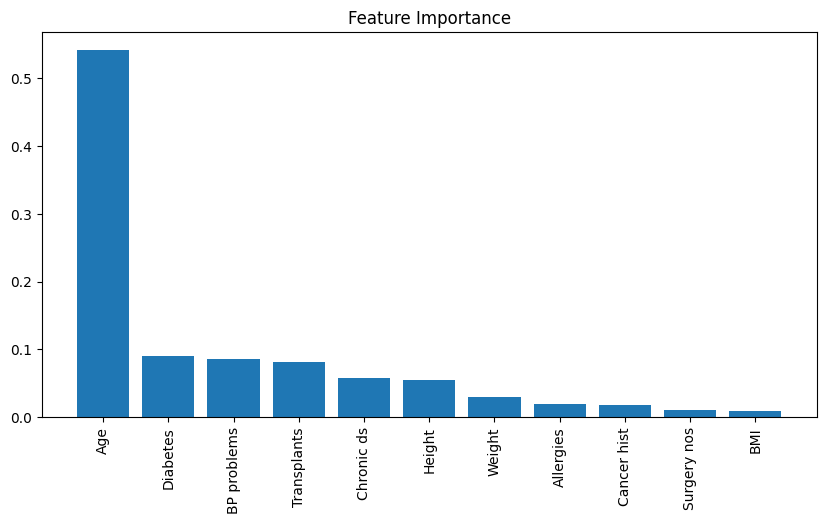

In [112]:
# Feature Importance
importances = RF.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = ["Age", "Diabetes", "BP problems", "Transplants", "Chronic ds","Height", "Weight", "Allergies", "Cancer hist", "Surgery nos", "BMI"]  # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(10, 5)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(len(names)), importances[indices]) # Add bars
plt.xticks(range(len(names)), names, rotation=90) # Add feature names as x-axis labels
plt.show()

- This shows that Age plays a major role in deciding the premium price of the individuals

In [113]:
df1.columns

Index(['Age', 'Diabetes', 'BP_problems', 'Transplants', 'Chronic_ds', 'Height',
       'Weight', 'Allergies', 'Cancer_hist', 'Surgery_nos', 'PremiumPrice',
       'age_cat', 'premium_cat', 'BMI', 'bmi_cat'],
      dtype='object')

In [114]:
df1.to_csv("insurance_pred.csv")

In [115]:
# --------------------------------------------------------------------------------------------------------------

## **Insights and recommendation**

- Based on all the analysis and study done above, it is sure that certain factors such as "Age", "BMI',"Blood pressure problems", "Transplants", "Presence of chronic diseases", "Number of surgeries done" plays a major part in deciding the premium price of the beneficiary.

- Hence an app will be created to predict the premium price using these 6 factors alone.

- Below are the steps towards the development of the app.

In [116]:
# -------------------------------------------------------------------------------------------------------------

## Segregating the target variable from the features

In [117]:
X = df1[['Age', 'BMI', 'BP_problems', 'Transplants', 'Chronic_ds', 'Surgery_nos', 'Diabetes']]
y = df1.PremiumPrice
X.shape, y.shape

((986, 7), (986,))

## Splitting the data

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

Model training

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Cross Validation**

In [120]:
pred_val = model.predict(X_val)
mse = mean_squared_error(y_val, pred_val)
r2 = r2_score(y_val, pred_val)

In [121]:
pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

## Saving the model

In [124]:
# saving the model
import pickle

with open("insurance.pkl", mode = "wb") as file:
  pickle.dump(model, file)

In [125]:
import pickle

with open("insurance.pkl", "rb") as file:
    model = pickle.load(file)
    print("Model loaded successfully!")

Model loaded successfully!
